In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding,SimpleRNN,LSTM, GRU,Bidirectional

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [ ]:
df1 = pd.read_csv("Twitter_Data.csv")
df2 = pd.read_csv("Reddit_Data.csv")

In [ ]:
df1.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
# Map categories
df1['category'] = df1['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
# Output first five rows
df1.head()


,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [ ]:
df1['clean_text'] = df1['clean_text'].astype(str)
# Pandas astype() is the one of the most important methods. It is used to change data type


In [ ]:
positive_msg=" ".join(df1[df1["category"]=="Positive"]["clean_text"])
negative_msg=" ".join(df1[df1["category"]=="Negative"]["clean_text"])
neutral_msg=" ".join(df1[df1["category"]=="Neutral"]["clean_text"])


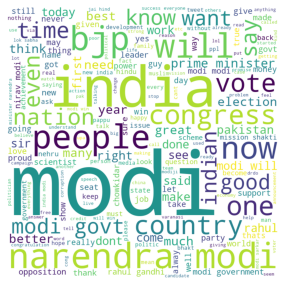

In [ ]:
wc = WordCloud(width = 800, height = 800,
 background_color ='white',
 min_font_size = 10)
wc.generate(positive_msg)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

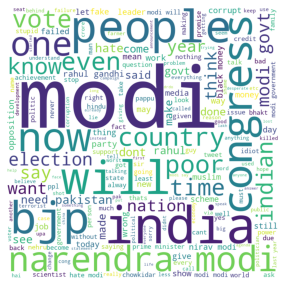

In [ ]:
wc = WordCloud(width = 800, height = 800,
 background_color ='white',
 min_font_size = 10)
wc.generate(negative_msg)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()


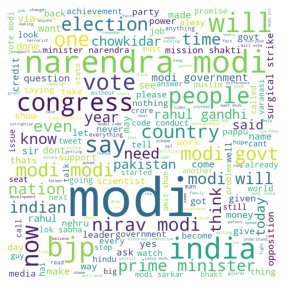

In [ ]:
wc = WordCloud(width = 800, height = 800,
 background_color ='white',
 min_font_size = 10)
wc.generate(neutral_msg)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()


In [ ]:
# Map categories
df1['category'] = df1['category'].map({'Negative':-1.0, 'Neutral':0.0, 'Positive':1.0})
# Output first five rows
df1.head()



,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df1.shape

(162980, 2)

In [ ]:
df2.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df2.shape

(37249, 2)

In [ ]:
df2.rename(columns={"clean_comment":"clean_text"},inplace=True)

In [ ]:
df2.head()

,clean_text,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df = df1.append(df2,ignore_index=True)

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.shape

(200229, 2)

In [ ]:
df.isnull().sum()


clean_text    100
category        7
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
# feature target split
X = df["clean_text"]
y = df["category"]

In [ ]:
y


0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
200224    0.0
200225    1.0
200226    0.0
200227    1.0
200228    0.0
Name: category, Length: 200122, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 1, 2, ..., 1, 2, 1])

In [ ]:
print(0,"-",le.inverse_transform([0])[0])
print(1,"-",le.inverse_transform([1])[0])
print(2,"-",le.inverse_transform([2])[0])

0 - -1.0
1 - 0.0
2 - 1.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
# Keras tokenization

tok = Tokenizer()
tok.fit_on_texts(X_train)

In [ ]:
vocabulary = tok.index_word
vocab_length = len(vocabulary)
vocab_length

112103

In [ ]:
# Sequence
train_sequence = tok.texts_to_sequences(X_train)

In [ ]:
# Length of all documents
doc_length = []
for doc in train_sequence:
  doc_length.append(len(doc))

In [ ]:
max(doc_length)

1307

In [ ]:
# 90% quantile
# 90% document length is less than or equal to 30
np.quantile(doc_length, 0.9)

37.0

In [ ]:
# 99% quantile
# 99% document length is less than or equal to 45
np.quantile(doc_length, 0.99)

98.0

In [ ]:
max_length = 37

In [ ]:
# Padding
train_matrix = sequence.pad_sequences(train_sequence,maxlen=max_length)
train_matrix

array([[   0,    0,    0, ...,    3, 2304, 1167],
       [   0,    0,    0, ...,    2,   21, 1839],
       [   0,    0,    0, ...,    3, 1639,  275],
       ...,
       [   0,    0,    0, ...,   43,   26,    5],
       [   0,    0,    0, ...,    2,  305, 9438],
       [   0,    0,    0, ...,  115, 1347,  255]], dtype=int32)

In [ ]:
# Testing data
test_sequence = tok.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,maxlen=max_length)
test_matrix

array([[    0,     0,     0, ...,   832,   149,     2],
       [    0,     0,     0, ...,    54,     9, 16070],
       [    0,     0,     0, ...,   948,   390,  5154],
       ...,
       [    0,     0,     0, ...,  4683,  1897,  1336],
       [    0,     0,     0, ...,  1140,     2,   539],
       [    0,     0,     0, ...,   237,  1119,   152]], dtype=int32)

In [ ]:
# model
model = Sequential()
model.add(Embedding(input_dim=vocab_length+1, # vocabulary length, +1 -> 0 tokens
                    input_length=max_length,  # max length of document -> 45
                    output_dim=32,           # hyperparameter -> vector length of each token
                    mask_zero=True))          # do not learn for 0 token
model.add(LSTM(32))
model.add(Dense(16,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy")
model.fit(train_matrix,y_train,epochs=5,batch_size=1024)

Epoch 1/5
137/137 [==============================] - 17s 92ms/step - loss: 0.8290
Epoch 2/5
137/137 [==============================] - 13s 91ms/step - loss: 0.2911
Epoch 3/5
137/137 [==============================] - 13s 92ms/step - loss: 0.1371
Epoch 4/5
137/137 [==============================] - 14s 100ms/step - loss: 0.1005
Epoch 5/5
137/137 [==============================] - 13s 91ms/step - loss: 0.0812


In [ ]:
y_pred = model.predict(test_matrix)

1877/1877 [==============================] - 15s 8ms/step


In [ ]:
y_pred

array([[1.4055697e-03, 3.4510810e-04, 9.9824929e-01],
       [9.8984033e-01, 1.9714972e-03, 8.1881266e-03],
       [1.9886245e-03, 9.0683257e-04, 9.9710459e-01],
       ...,
       [4.9866026e-04, 1.0761716e-04, 9.9939370e-01],
       [9.5614605e-06, 9.9998248e-01, 7.9892343e-06],
       [1.8354546e-04, 4.1383577e-05, 9.9977511e-01]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_pred

array([2, 0, 2, ..., 2, 1, 2])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     13126
           1       0.96      0.97      0.96     20711
           2       0.93      0.93      0.93     26200

    accuracy                           0.93     60037
   macro avg       0.92      0.92      0.92     60037
weighted avg       0.93      0.93      0.93     60037



Summarising what has been done so far and what has been acheived

In This Excerise we have developed and entire text sentiment detection system which predicts the text label in one of the three category i.e (Negative, Neurtal & Positive).

We have gone through the entire process from data loading to EDA to Preprocessing to Model Traininng and its evaluation .

Our model has acheived the accuracy of ~93% using Dense-LSTM architecture In 5 epochs, which can be further trained and tuned.

a model using Twitter and Reddit data has an accuracy of 93%, it means that the model is able to correctly classify or predict the outcome for 93% of the data points in the dataset. This is a good indication that the model is performing well and is able to generalize well to new data.
